In [109]:
import pandas as pd
from varclushi import VarClusHi


In [110]:
tgt=pd.read_csv('Churn.csv')

In [111]:
tgt.sample(5)

,linea,mesproceso,descestatuslinea,tiposuscripcion,antiglinea
87989,9622391807,202010,ACTIVO,PREPAGO,42
71368,4421870126,202009,ACTIVO,PREPAGO,192
34789,6121426686,202005,ACTIVO,MIXTO,68
42204,4436928955,202006,ACTIVO,PREPAGO,16
132603,6643154766,202103,ACTIVO,PREPAGO,46


In [112]:
tgt

,linea,mesproceso,descestatuslinea,tiposuscripcion,antiglinea
0,2211028897,202002,ACTIVO,PREPAGO,32
1,2211037957,202002,ACTIVO,PREPAGO,10
2,2211048381,202002,ACTIVO,PREPAGO,34
3,2211057087,202002,ACTIVO,PREPAGO,5
4,2211097068,202002,ACTIVO,PREPAGO,32
...,...,...,...,...,...
181780,9999604409,202108,ACTIVO,PREPAGO,14
181781,9999911375,202108,ACTIVO,PREPAGO,69
181782,9999931138,202108,ZERO BALANCE 2,PREPAGO,23
181783,9999976821,202108,ZERO BALANCE 1,PREPAGO,23


In [113]:
eq=pd.read_csv('Equipos.csv')

In [114]:
eq.sample()

,linea,mesproceso,modeloeq
26521,5554654162,202002,MOTO G4 XT1621


In [115]:
mt=pd.read_csv('Recargas.csv')

In [116]:
mt.columns=['linea', 'mesproceso', 'monto', 'monto_prom', 'monto_max', 'monto_min',
       'recargas']

In [117]:
mt

,linea,mesproceso,monto,monto_prom,monto_max,monto_min,recargas
0,2221367909,202001,180.0,45.00,50.0,30.0,4
1,8123952747,202001,250.0,83.33,150.0,50.0,3
2,7561115726,202001,200.0,100.00,100.0,100.0,2
3,2381638664,202001,170.0,42.50,50.0,20.0,4
4,2225326803,202001,200.0,50.00,50.0,50.0,4
...,...,...,...,...,...,...,...
134534,3131004550,202109,50.0,50.00,50.0,50.0,1
134535,4341218463,202109,50.0,50.00,50.0,50.0,1
134536,5572227182,202109,20.0,20.00,20.0,20.0,1
134537,4626304631,202109,50.0,50.00,50.0,50.0,1


In [118]:
df=tgt.merge(eq, how='left',on=['linea','mesproceso'])

In [119]:
df=df.merge(mt, how='left',on=['linea','mesproceso'])

In [120]:
a=df.value_counts('mesproceso').reset_index().reset_index()

In [121]:
a.index=a['mesproceso']

In [122]:
df['mes']=df['mesproceso'].replace(dict(a['index']))

In [123]:
vobs , vdes = 4,2
anclai, anclaf = vobs-1,df['mes'].max()-vdes
anclai, anclaf

(3, 16)

In [124]:
for a in range(anclai,anclaf+1):
    print("observación: ",list(range(a-vobs+1,a+1)),'desempeño:', list(range(a+1,a+vdes+1)))

observación:  [0, 1, 2, 3] desempeño: [4, 5]
observación:  [1, 2, 3, 4] desempeño: [5, 6]
observación:  [2, 3, 4, 5] desempeño: [6, 7]
observación:  [3, 4, 5, 6] desempeño: [7, 8]
observación:  [4, 5, 6, 7] desempeño: [8, 9]
observación:  [5, 6, 7, 8] desempeño: [9, 10]
observación:  [6, 7, 8, 9] desempeño: [10, 11]
observación:  [7, 8, 9, 10] desempeño: [11, 12]
observación:  [8, 9, 10, 11] desempeño: [12, 13]
observación:  [9, 10, 11, 12] desempeño: [13, 14]
observación:  [10, 11, 12, 13] desempeño: [14, 15]
observación:  [11, 12, 13, 14] desempeño: [15, 16]
observación:  [12, 13, 14, 15] desempeño: [16, 17]
observación:  [13, 14, 15, 16] desempeño: [17, 18]


In [125]:
df=df.fillna(0)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182167 entries, 0 to 182166
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   linea             182167 non-null  int64  
 1   mesproceso        182167 non-null  int64  
 2   descestatuslinea  182167 non-null  object 
 3   tiposuscripcion   182167 non-null  object 
 4   antiglinea        182167 non-null  object 
 5   modeloeq          182167 non-null  object 
 6   monto             182167 non-null  float64
 7   monto_prom        182167 non-null  float64
 8   monto_max         182167 non-null  float64
 9   monto_min         182167 non-null  float64
 10  recargas          182167 non-null  float64
 11  mes               182167 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 18.1+ MB


In [127]:
df['modeloeq']=df['modeloeq'].replace('(null)',0)

In [128]:
df=df[df['descestatuslinea']!='ZERO BALANCE 2']

In [129]:
df[df['linea']==2727837042]

,linea,mesproceso,descestatuslinea,tiposuscripcion,antiglinea,modeloeq,monto,monto_prom,monto_max,monto_min,recargas,mes
777,2727837042,202002,ACTIVO,PREPAGO,40,IPHONE SE A1723,100.0,100.0,100.0,100.0,1.0,0
10775,2727837042,202003,ZERO BALANCE 1,PREPAGO,41,IPHONE SE A1723,150.0,50.0,50.0,50.0,3.0,1
20744,2727837042,202004,ZERO BALANCE 1,PREPAGO,42,IPHONE SE A1723,50.0,50.0,50.0,50.0,1.0,2
30681,2727837042,202005,ZERO BALANCE 1,PREPAGO,43,IPHONE SE A1723,0.0,0.0,0.0,0.0,0.0,3
40573,2727837042,202006,ZERO BALANCE 1,PREPAGO,44,IPHONE SE A1723,100.0,50.0,50.0,50.0,2.0,4
50428,2727837042,202007,ACTIVO,PREPAGO,45,IPHONE SE A1723,150.0,75.0,100.0,50.0,2.0,5
60226,2727837042,202008,ACTIVO,PREPAGO,46,IPHONE SE A1723,200.0,100.0,100.0,100.0,2.0,6
69980,2727837042,202009,ZERO BALANCE 1,PREPAGO,47,IPHONE SE A1723,50.0,50.0,50.0,50.0,1.0,7
79707,2727837042,202010,ZERO BALANCE 1,PREPAGO,48,IPHONE SE A1723,60.0,30.0,50.0,10.0,2.0,8
89401,2727837042,202011,ZERO BALANCE 1,PREPAGO,49,IPHONE SE A1723,0.0,0.0,0.0,0.0,0.0,9


In [130]:
df=df.drop_duplicates()

### Ingeniería de Variables

In [131]:
def ing_X(df,ancla,k):
    l = []
    aux = df.loc[(df['mes']<=ancla)&(df['mes']>=(ancla-k+1))]

    if k==4:
    # Registros durante  el periodo total de observación
        piv = aux.pivot_table(index='linea',
                         columns='mes',
                         values='monto',
                         aggfunc='count')
        piv[f'x_permanencia'] = piv.sum(axis=1)
        l.append(piv.filter(like='x_'))
        
    # Antiguedad línea en periodo final   
        piv = aux.pivot_table(index='linea',
                         columns='mes',
                         values='antiglinea',
                         aggfunc='sum')
        piv[f'x_antiglinea'] = piv.max(axis=1)
        l.append(piv.filter(like='x_'))
    #Estatus de línea más frecuente
        piv = aux.pivot_table(index='linea',
                              columns='descestatuslinea',
                              values='mesproceso',
                              aggfunc='count',
                              fill_value=0)
        piv[f'xd_estatus_frecuente'] = piv.idxmax(axis=1)
        l.append(piv.filter(like='xd_'))

    #Cantidad de equipos diferentes en el periodo
    a=aux.groupby('linea')['modeloeq'].nunique()
    a.name=f'x_cambios_eq_{k}'
    l.append(a)    
    
    #Monto 
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto',
                          aggfunc='sum')
    piv[f'x_monto_recargado_{k}'] = piv.sum(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Monto Promedio
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto',
                          aggfunc='sum')
    piv[f'x_monto_promedio_{k}'] = piv.mean(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Promedio del promedio por recarga
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto_prom',
                          aggfunc='sum')
    piv[f'x_prom_recarga_{k}'] = piv.mean(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Suma de promedio por recarga 
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto_prom',
                          aggfunc='sum')
    piv[f'x_sum_prom_recarga_{k}'] = piv.sum(axis=1)
    l.append(piv.filter(like='x_'))
        
    #Mínimo de monto 
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto',
                          aggfunc='sum')
    piv[f'x_min_monto_{k}'] = piv.min(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Máximo de monto 
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto',
                          aggfunc='sum')
    piv[f'x_max_monto_{k}'] = piv.max(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Promedio de recarga mínima 
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto_min',
                          aggfunc='sum')
    piv[f'x_min_recarga_{k}'] = piv.mean(axis=1)
    l.append(piv.filter(like='x_'))
    
    #Promedio de recarga máxima
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='monto_max',
                          aggfunc='sum')
    piv[f'x_max_recarga_{k}'] = piv.mean(axis=1)
    l.append(piv.filter(like='x_'))    

    #Promedio recargas mensuales
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='recargas',
                          aggfunc='sum')
    piv[f'x_recargas_prom_{k}'] = piv.mean(axis=1)
    l.append(piv.filter(like='x_'))    
    
    #Total de recargas
    piv = aux.pivot_table(index='linea',
                          columns='mes',
                          values='recargas',
                          aggfunc='sum')
    piv[f'x_recargas_{k}'] = piv.sum(axis=1)
    l.append(piv.filter(like='x_'))    
    
      
    aux = reduce(lambda x,y:pd.merge(x,
                                      y,
                                      left_index=True,
                                      right_index=True,
                                      how='outer'),l).reset_index()
    aux.insert(1,'ancla',ancla)
    
    return aux

In [132]:
from functools import reduce

In [133]:
step = 2

In [134]:
um = ['linea','ancla']

In [135]:
cruzar = lambda x,y:pd.merge(x,y,on=um,how='outer')
apilar = lambda x,y:x.append(y,ignore_index=True)

In [136]:
X = reduce(apilar, map(lambda ancla:reduce(cruzar, map(lambda k:ing_X(df,ancla,k), range(step,vobs+step,step)) ),range(anclai,anclaf+1)))

In [137]:
X.head()

,linea,ancla,x_cambios_eq_2,x_monto_recargado_2,x_monto_promedio_2,x_prom_recarga_2,x_sum_prom_recarga_2,x_min_monto_2,x_max_monto_2,x_min_recarga_2,x_max_recarga_2,x_recargas_prom_2,x_recargas_2,x_permanencia,x_antiglinea,xd_estatus_frecuente,x_cambios_eq_4,x_monto_recargado_4,x_monto_promedio_4,x_prom_recarga_4,x_sum_prom_recarga_4,x_min_monto_4,x_max_monto_4,x_min_recarga_4,x_max_recarga_4,x_recargas_prom_4,x_recargas_4
0,2211028897,3,1.0,350.0,175.0,87.5,175.0,150.0,200.0,75.0,100.0,2.0,4.0,4.0,NaN,ACTIVO,1,750.0,187.5,93.750,375.00,150.0,200.0,87.5,100.0,2.00,8.0
1,2211037957,3,1.0,30.0,15.0,7.5,15.0,0.0,30.0,5.0,10.0,1.0,2.0,4.0,NaN,ZERO BALANCE 1,2,180.0,45.0,16.250,65.00,0.0,150.0,15.0,17.5,1.25,5.0
2,2211048381,3,1.0,300.0,150.0,100.0,200.0,100.0,200.0,100.0,100.0,1.5,3.0,4.0,NaN,ACTIVO,1,700.0,175.0,100.000,400.00,100.0,200.0,100.0,100.0,1.75,7.0
3,2211057087,3,1.0,100.0,50.0,32.5,65.0,30.0,70.0,25.0,40.0,1.5,3.0,4.0,NaN,ACTIVO,1,550.0,137.5,38.750,155.00,30.0,230.0,25.0,45.0,3.25,13.0
4,2211097068,3,1.0,400.0,200.0,100.0,200.0,200.0,200.0,100.0,100.0,2.0,4.0,4.0,NaN,ACTIVO,1,900.0,225.0,91.665,366.66,200.0,250.0,75.0,100.0,2.50,10.0


In [138]:
X['x_permanencia'].value_counts()

4.0    123645
3.0      3046
2.0      2355
1.0      2220
Name: x_permanencia, dtype: int64

In [139]:
X

,linea,ancla,x_cambios_eq_2,x_monto_recargado_2,x_monto_promedio_2,x_prom_recarga_2,x_sum_prom_recarga_2,x_min_monto_2,x_max_monto_2,x_min_recarga_2,x_max_recarga_2,x_recargas_prom_2,x_recargas_2,x_permanencia,x_antiglinea,xd_estatus_frecuente,x_cambios_eq_4,x_monto_recargado_4,x_monto_promedio_4,x_prom_recarga_4,x_sum_prom_recarga_4,x_min_monto_4,x_max_monto_4,x_min_recarga_4,x_max_recarga_4,x_recargas_prom_4,x_recargas_4
0,2211028897,3,1.0,350.0,175.0,87.5,175.0,150.0,200.0,75.0,100.0,2.0,4.0,4.0,NaN,ACTIVO,1,750.0,187.5,93.750,375.00,150.0,200.0,87.5,100.0,2.00,8.0
1,2211037957,3,1.0,30.0,15.0,7.5,15.0,0.0,30.0,5.0,10.0,1.0,2.0,4.0,NaN,ZERO BALANCE 1,2,180.0,45.0,16.250,65.00,0.0,150.0,15.0,17.5,1.25,5.0
2,2211048381,3,1.0,300.0,150.0,100.0,200.0,100.0,200.0,100.0,100.0,1.5,3.0,4.0,NaN,ACTIVO,1,700.0,175.0,100.000,400.00,100.0,200.0,100.0,100.0,1.75,7.0
3,2211057087,3,1.0,100.0,50.0,32.5,65.0,30.0,70.0,25.0,40.0,1.5,3.0,4.0,NaN,ACTIVO,1,550.0,137.5,38.750,155.00,30.0,230.0,25.0,45.0,3.25,13.0
4,2211097068,3,1.0,400.0,200.0,100.0,200.0,200.0,200.0,100.0,100.0,2.0,4.0,4.0,NaN,ACTIVO,1,900.0,225.0,91.665,366.66,200.0,250.0,75.0,100.0,2.50,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131261,9932250720,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ZERO BALANCE 1,1,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.00,0.0
131262,9935908764,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ZERO BALANCE 1,1,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.00,0.0
131263,9992410635,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ZERO BALANCE 1,1,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.00,0.0
131264,9992645004,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ZERO BALANCE 1,1,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [140]:
X=X[(X['x_permanencia']==vobs)&(X['xd_estatus_frecuente']=='ACTIVO')]

## Variable Objetivo

In [141]:
def ing_y(df,ancla):
    l = []
    aux = df.loc[(df['mes']>ancla)&(df['mes']<=(ancla+vdes))][['linea']].drop_duplicates().reset_index(drop=True).assign(churn=0)
    aux.insert(1,'ancla',ancla)
    return aux

In [142]:
y = reduce(apilar,map(lambda ancla:ing_y(df,ancla),range(anclai,anclaf+1)))

In [143]:
tad = X.merge(y,on=um,how='left')
tad['churn'].fillna(1,inplace=True)
tad['churn'].value_counts(True)

0.0    0.995781
1.0    0.004219
Name: churn, dtype: float64

In [271]:
tad1=pd.concat([tad[tad['churn']==1],tad[tad['churn']!=1].sample(4000)])

In [272]:
varc = sorted(tad.filter(like='x_').columns)
vart = ['churn']

In [273]:
varc.remove('x_antiglinea')

In [274]:
varc.remove('x_permanencia')

### Análisis Exploratorio

array([[<AxesSubplot:title={'center':'x_cambios_eq_2'}>,
        <AxesSubplot:title={'center':'x_cambios_eq_4'}>,
        <AxesSubplot:title={'center':'x_max_monto_2'}>,
        <AxesSubplot:title={'center':'x_max_monto_4'}>,
        <AxesSubplot:title={'center':'x_max_recarga_2'}>],
       [<AxesSubplot:title={'center':'x_max_recarga_4'}>,
        <AxesSubplot:title={'center':'x_min_monto_2'}>,
        <AxesSubplot:title={'center':'x_min_monto_4'}>,
        <AxesSubplot:title={'center':'x_min_recarga_2'}>,
        <AxesSubplot:title={'center':'x_min_recarga_4'}>],
       [<AxesSubplot:title={'center':'x_monto_promedio_2'}>,
        <AxesSubplot:title={'center':'x_monto_promedio_4'}>,
        <AxesSubplot:title={'center':'x_monto_recargado_2'}>,
        <AxesSubplot:title={'center':'x_monto_recargado_4'}>,
        <AxesSubplot:title={'center':'x_prom_recarga_2'}>],
       [<AxesSubplot:title={'center':'x_prom_recarga_4'}>,
        <AxesSubplot:title={'center':'x_recargas_2'}>,
        

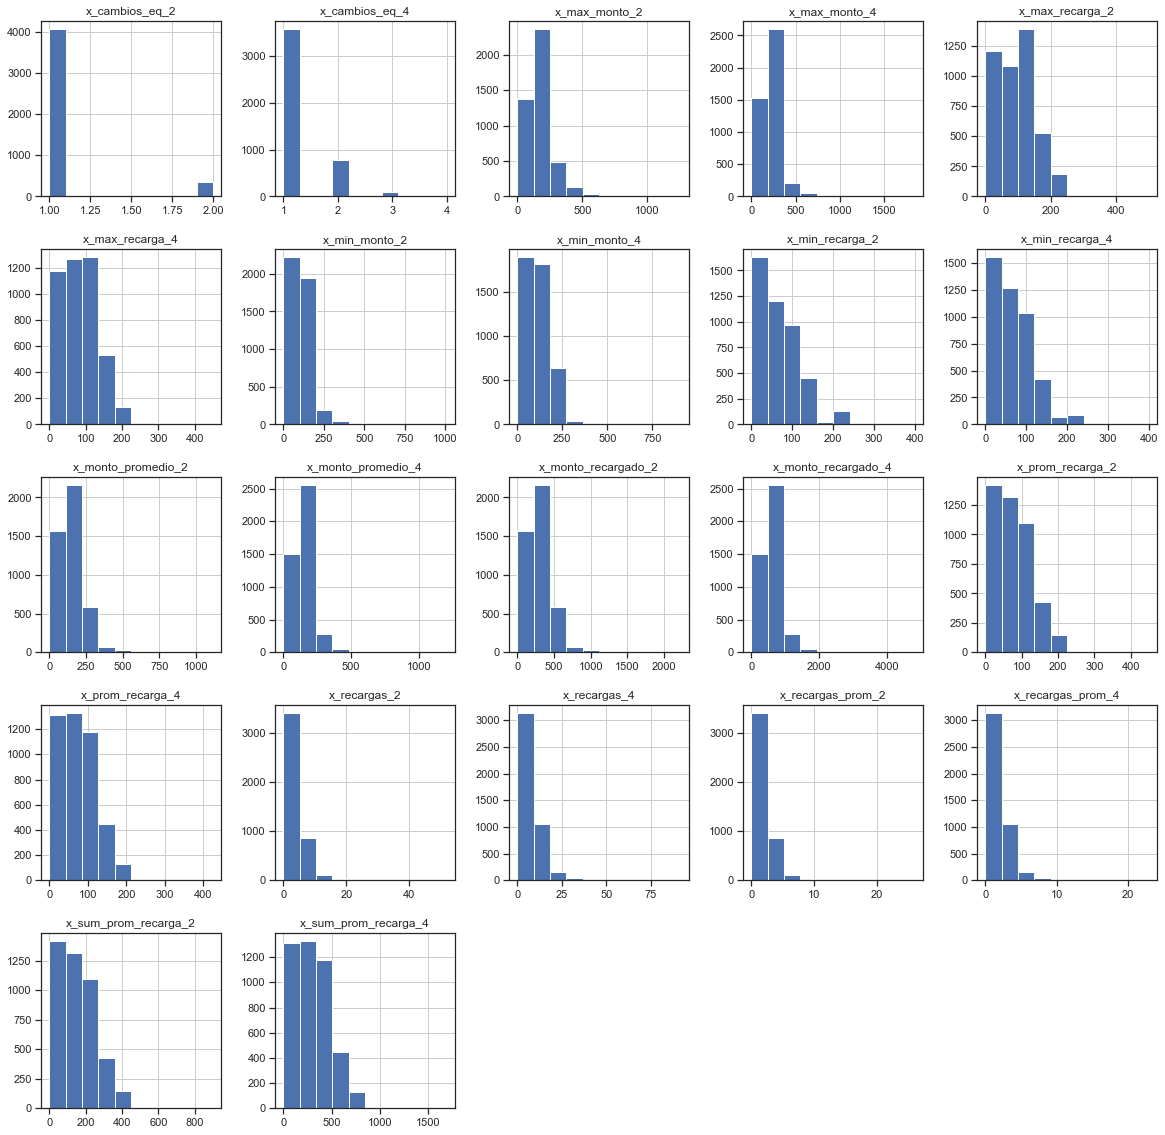

In [275]:
tad1[varc].hist(figsize=(20,20))

## Multicolinealidad

In [276]:
vc = VarClusHi(df=tad1,feat_list=varc)
vc.varclus()
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount()+1
best = rs.loc[rs['id']==1]['Variable'].tolist()
best

['x_prom_recarga_4', 'x_monto_promedio_2', 'x_cambios_eq_2', 'x_recargas_2']

In [277]:
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,x_prom_recarga_4,0.978714,0.408512,0.035987,1
1,0,x_sum_prom_recarga_4,0.978714,0.408512,0.035987,2
2,0,x_prom_recarga_2,0.978579,0.417670,0.036786,3
3,0,x_sum_prom_recarga_2,0.978579,0.417670,0.036786,4
4,0,x_min_recarga_4,0.943037,0.312128,0.082811,5
5,0,x_min_recarga_2,0.931910,0.314613,0.099346,6
6,0,x_max_recarga_4,0.941891,0.495376,0.115153,7
7,0,x_max_recarga_2,0.932641,0.507580,0.136792,8
8,1,x_monto_promedio_2,0.969343,0.461020,0.056880,1
9,1,x_monto_recargado_2,0.969343,0.461020,0.056880,2


array([[<AxesSubplot:title={'center':'x_prom_recarga_4'}>,
        <AxesSubplot:title={'center':'x_monto_promedio_2'}>],
       [<AxesSubplot:title={'center':'x_cambios_eq_2'}>,
        <AxesSubplot:title={'center':'x_recargas_2'}>]], dtype=object)

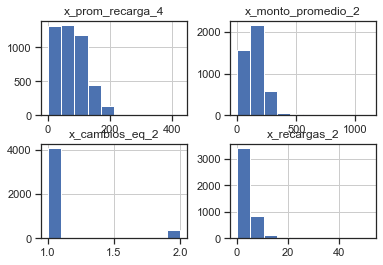

In [278]:
tad1[best].hist()

In [279]:
from sklearn.feature_selection import SelectKBest

In [280]:
sk = SelectKBest(k=4)

In [281]:
sk.fit(tad1[best],tad1[vart])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k=4)

In [282]:
scores = pd.DataFrame(zip(best,sk.scores_),columns=['variable','score'])
scores = scores.sort_values(by='score',ascending=False)
scores

,variable,score
1,x_monto_promedio_2,83.426887
0,x_prom_recarga_4,80.739199
3,x_recargas_2,25.052300
2,x_cambios_eq_2,17.137595


In [283]:
Xi=tad1[um+varc+vart]

## Modelado

In [359]:
import numpy as np
import pandas as pd

from datetime import date
from dateutil.relativedelta import relativedelta as rd

import os
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from functools import reduce

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from scikitplot.metrics import plot_ks_statistic,plot_roc_curve, confusion_matrix,plot_roc, plot_confusion_matrix

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from scipy.stats import ks_2samp,kruskal
from varclushi import VarClusHi

cf.go_offline()
pd.set_option('display.max_columns',None)

In [285]:
sc = MinMaxScaler()

In [286]:
sc.fit(Xi[varc])

MinMaxScaler()

In [287]:
Xi.reset_index(drop=True,inplace=True)

In [288]:
Xi

,linea,ancla,x_cambios_eq_2,x_cambios_eq_4,x_max_monto_2,x_max_monto_4,x_max_recarga_2,x_max_recarga_4,x_min_monto_2,x_min_monto_4,x_min_recarga_2,x_min_recarga_4,x_monto_promedio_2,x_monto_promedio_4,x_monto_recargado_2,x_monto_recargado_4,x_prom_recarga_2,x_prom_recarga_4,x_recargas_2,x_recargas_4,x_recargas_prom_2,x_recargas_prom_4,x_sum_prom_recarga_2,x_sum_prom_recarga_4,churn
0,2221139363,3,1.0,1,130.0,230.0,30.0,65.0,30.0,30.0,25.0,27.50,80.0,130.00,160.0,520.0,28.0,49.4175,6.0,11.0,3.0,2.75,56.0,197.67,1.0
1,2283243093,3,1.0,1,120.0,120.0,100.0,75.0,100.0,0.0,60.0,55.00,110.0,80.00,220.0,320.0,80.0,65.0000,3.0,4.0,1.5,1.00,160.0,260.00,1.0
2,2461033436,3,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.00,1.0
3,2731261175,3,1.0,1,150.0,245.0,150.0,137.5,150.0,150.0,150.0,116.25,150.0,173.75,300.0,695.0,150.0,124.7500,2.0,8.0,1.0,2.00,300.0,499.00,1.0
4,2851009183,3,1.0,1,250.0,250.0,125.0,112.5,100.0,100.0,100.0,100.00,175.0,187.50,350.0,750.0,112.5,106.2500,3.0,7.0,1.5,1.75,225.0,425.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,2461868992,8,1.0,1,200.0,200.0,100.0,100.0,200.0,100.0,100.0,100.00,200.0,175.00,400.0,700.0,100.0,100.0000,4.0,7.0,2.0,1.75,200.0,400.00,0.0
4416,4522349424,4,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4417,4612972042,5,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4418,7471557742,11,1.0,1,140.0,180.0,40.0,45.0,50.0,50.0,25.0,32.50,95.0,117.50,190.0,470.0,30.0,38.7500,6.0,12.0,3.0,3.00,60.0,155.00,0.0


array([[<AxesSubplot:title={'center':'linea'}>,
        <AxesSubplot:title={'center':'ancla'}>,
        <AxesSubplot:title={'center':'x_cambios_eq_2'}>,
        <AxesSubplot:title={'center':'x_cambios_eq_4'}>,
        <AxesSubplot:title={'center':'x_max_monto_2'}>],
       [<AxesSubplot:title={'center':'x_max_monto_4'}>,
        <AxesSubplot:title={'center':'x_max_recarga_2'}>,
        <AxesSubplot:title={'center':'x_max_recarga_4'}>,
        <AxesSubplot:title={'center':'x_min_monto_2'}>,
        <AxesSubplot:title={'center':'x_min_monto_4'}>],
       [<AxesSubplot:title={'center':'x_min_recarga_2'}>,
        <AxesSubplot:title={'center':'x_min_recarga_4'}>,
        <AxesSubplot:title={'center':'x_monto_promedio_2'}>,
        <AxesSubplot:title={'center':'x_monto_promedio_4'}>,
        <AxesSubplot:title={'center':'x_monto_recargado_2'}>],
       [<AxesSubplot:title={'center':'x_monto_recargado_4'}>,
        <AxesSubplot:title={'center':'x_prom_recarga_2'}>,
        <AxesSubplot:title

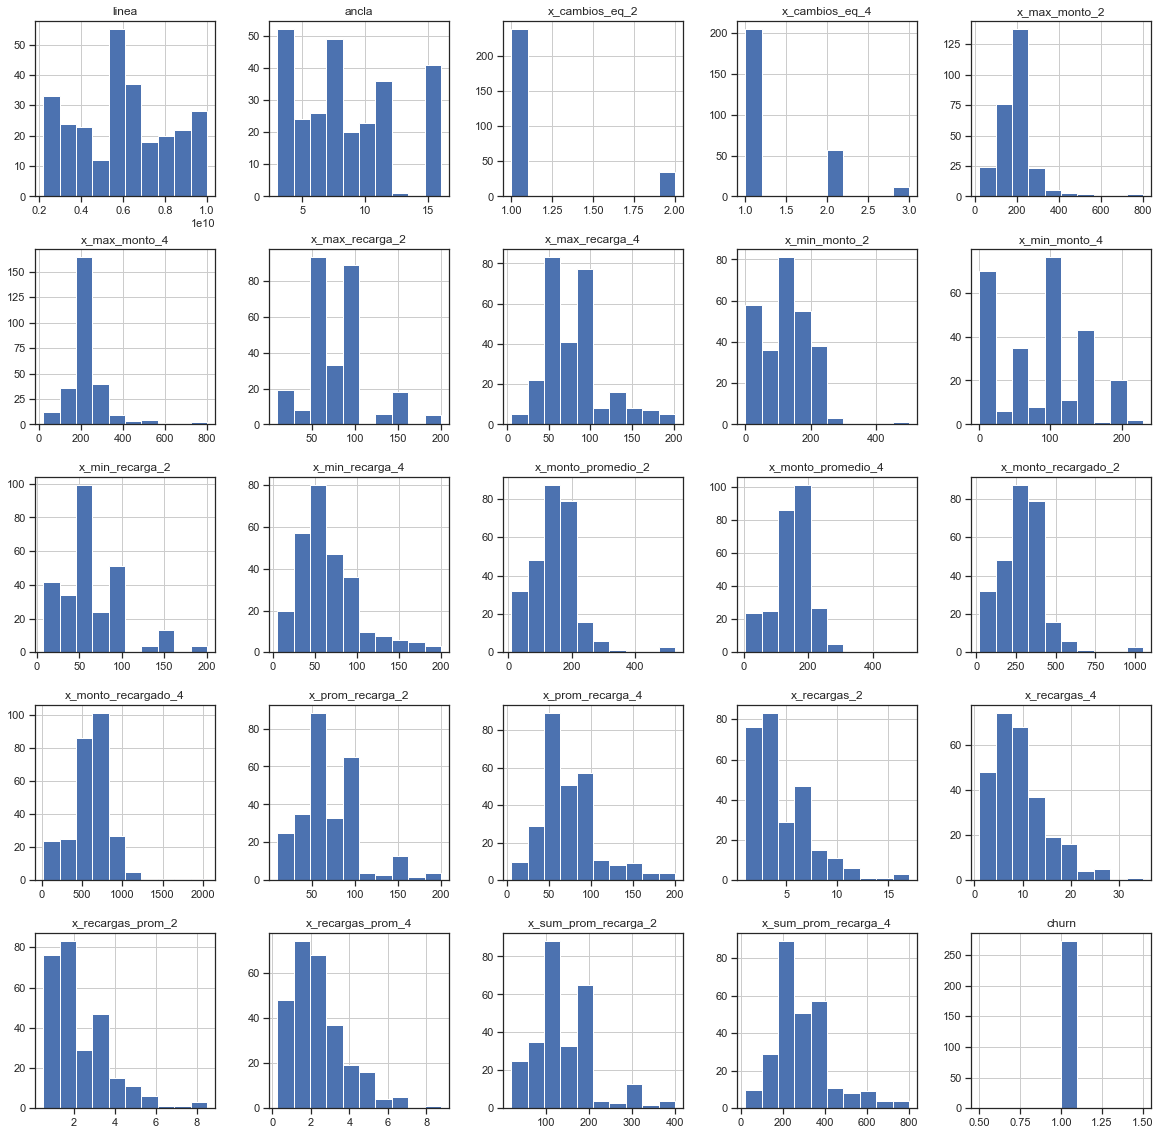

In [289]:
Xi[(Xi['churn']==1)&(Xi['x_prom_recarga_2']!=0)].hist(figsize=(20,20))

In [290]:
X = pd.DataFrame(sc.transform(Xi[varc]),columns=varc)
X[um] = Xi[um]
X[vart] = Xi[vart]

In [291]:
X

,x_cambios_eq_2,x_cambios_eq_4,x_max_monto_2,x_max_monto_4,x_max_recarga_2,x_max_recarga_4,x_min_monto_2,x_min_monto_4,x_min_recarga_2,x_min_recarga_4,x_monto_promedio_2,x_monto_promedio_4,x_monto_recargado_2,x_monto_recargado_4,x_prom_recarga_2,x_prom_recarga_4,x_recargas_2,x_recargas_4,x_recargas_prom_2,x_recargas_prom_4,x_sum_prom_recarga_2,x_sum_prom_recarga_4,linea,ancla,churn
0,0.0,0.000000,0.103175,0.124324,0.06,0.144444,0.029703,0.032967,0.0625,0.068750,0.071588,0.107660,0.071588,0.107660,0.062222,0.116276,0.115385,0.119565,0.115385,0.119565,0.062222,0.116276,2221139363,3,1.0
1,0.0,0.000000,0.095238,0.064865,0.20,0.166667,0.099010,0.000000,0.1500,0.137500,0.098434,0.066253,0.098434,0.066253,0.177778,0.152941,0.057692,0.043478,0.057692,0.043478,0.177778,0.152941,2283243093,3,1.0
2,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2461033436,3,1.0
3,0.0,0.000000,0.119048,0.132432,0.30,0.305556,0.148515,0.164835,0.3750,0.290625,0.134228,0.143892,0.134228,0.143892,0.333333,0.293529,0.038462,0.086957,0.038462,0.086957,0.333333,0.293529,2731261175,3,1.0
4,0.0,0.000000,0.198413,0.135135,0.25,0.250000,0.099010,0.109890,0.2500,0.250000,0.156600,0.155280,0.156600,0.155280,0.250000,0.250000,0.057692,0.076087,0.057692,0.076087,0.250000,0.250000,2851009183,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,0.0,0.000000,0.158730,0.108108,0.20,0.222222,0.198020,0.109890,0.2500,0.250000,0.178971,0.144928,0.178971,0.144928,0.222222,0.235294,0.076923,0.076087,0.076923,0.076087,0.222222,0.235294,2461868992,8,0.0
4416,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4522349424,4,0.0
4417,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4612972042,5,0.0
4418,0.0,0.000000,0.111111,0.097297,0.08,0.100000,0.049505,0.054945,0.0625,0.081250,0.085011,0.097308,0.085011,0.097308,0.066667,0.091176,0.115385,0.130435,0.115385,0.130435,0.066667,0.091176,7471557742,11,0.0


In [292]:
X.head()

,x_cambios_eq_2,x_cambios_eq_4,x_max_monto_2,x_max_monto_4,x_max_recarga_2,x_max_recarga_4,x_min_monto_2,x_min_monto_4,x_min_recarga_2,x_min_recarga_4,x_monto_promedio_2,x_monto_promedio_4,x_monto_recargado_2,x_monto_recargado_4,x_prom_recarga_2,x_prom_recarga_4,x_recargas_2,x_recargas_4,x_recargas_prom_2,x_recargas_prom_4,x_sum_prom_recarga_2,x_sum_prom_recarga_4,linea,ancla,churn
0,0.0,0.000000,0.103175,0.124324,0.06,0.144444,0.029703,0.032967,0.0625,0.068750,0.071588,0.107660,0.071588,0.107660,0.062222,0.116276,0.115385,0.119565,0.115385,0.119565,0.062222,0.116276,2221139363,3,1.0
1,0.0,0.000000,0.095238,0.064865,0.20,0.166667,0.099010,0.000000,0.1500,0.137500,0.098434,0.066253,0.098434,0.066253,0.177778,0.152941,0.057692,0.043478,0.057692,0.043478,0.177778,0.152941,2283243093,3,1.0
2,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2461033436,3,1.0
3,0.0,0.000000,0.119048,0.132432,0.30,0.305556,0.148515,0.164835,0.3750,0.290625,0.134228,0.143892,0.134228,0.143892,0.333333,0.293529,0.038462,0.086957,0.038462,0.086957,0.333333,0.293529,2731261175,3,1.0
4,0.0,0.000000,0.198413,0.135135,0.25,0.250000,0.099010,0.109890,0.2500,0.250000,0.156600,0.155280,0.156600,0.155280,0.250000,0.250000,0.057692,0.076087,0.057692,0.076087,0.250000,0.250000,2851009183,3,1.0


In [293]:
X['Churn']=X['churn'].map(lambda x: 'Fuga' if x==1 else 'No Fuga')

In [294]:
X

,x_cambios_eq_2,x_cambios_eq_4,x_max_monto_2,x_max_monto_4,x_max_recarga_2,x_max_recarga_4,x_min_monto_2,x_min_monto_4,x_min_recarga_2,x_min_recarga_4,x_monto_promedio_2,x_monto_promedio_4,x_monto_recargado_2,x_monto_recargado_4,x_prom_recarga_2,x_prom_recarga_4,x_recargas_2,x_recargas_4,x_recargas_prom_2,x_recargas_prom_4,x_sum_prom_recarga_2,x_sum_prom_recarga_4,linea,ancla,churn,Churn
0,0.0,0.000000,0.103175,0.124324,0.06,0.144444,0.029703,0.032967,0.0625,0.068750,0.071588,0.107660,0.071588,0.107660,0.062222,0.116276,0.115385,0.119565,0.115385,0.119565,0.062222,0.116276,2221139363,3,1.0,Fuga
1,0.0,0.000000,0.095238,0.064865,0.20,0.166667,0.099010,0.000000,0.1500,0.137500,0.098434,0.066253,0.098434,0.066253,0.177778,0.152941,0.057692,0.043478,0.057692,0.043478,0.177778,0.152941,2283243093,3,1.0,Fuga
2,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2461033436,3,1.0,Fuga
3,0.0,0.000000,0.119048,0.132432,0.30,0.305556,0.148515,0.164835,0.3750,0.290625,0.134228,0.143892,0.134228,0.143892,0.333333,0.293529,0.038462,0.086957,0.038462,0.086957,0.333333,0.293529,2731261175,3,1.0,Fuga
4,0.0,0.000000,0.198413,0.135135,0.25,0.250000,0.099010,0.109890,0.2500,0.250000,0.156600,0.155280,0.156600,0.155280,0.250000,0.250000,0.057692,0.076087,0.057692,0.076087,0.250000,0.250000,2851009183,3,1.0,Fuga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,0.0,0.000000,0.158730,0.108108,0.20,0.222222,0.198020,0.109890,0.2500,0.250000,0.178971,0.144928,0.178971,0.144928,0.222222,0.235294,0.076923,0.076087,0.076923,0.076087,0.222222,0.235294,2461868992,8,0.0,No Fuga
4416,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4522349424,4,0.0,No Fuga
4417,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4612972042,5,0.0,No Fuga
4418,0.0,0.000000,0.111111,0.097297,0.08,0.100000,0.049505,0.054945,0.0625,0.081250,0.085011,0.097308,0.085011,0.097308,0.066667,0.091176,0.115385,0.130435,0.115385,0.130435,0.066667,0.091176,7471557742,11,0.0,No Fuga


In [295]:
best

['x_prom_recarga_4', 'x_monto_promedio_2', 'x_cambios_eq_2', 'x_recargas_2']

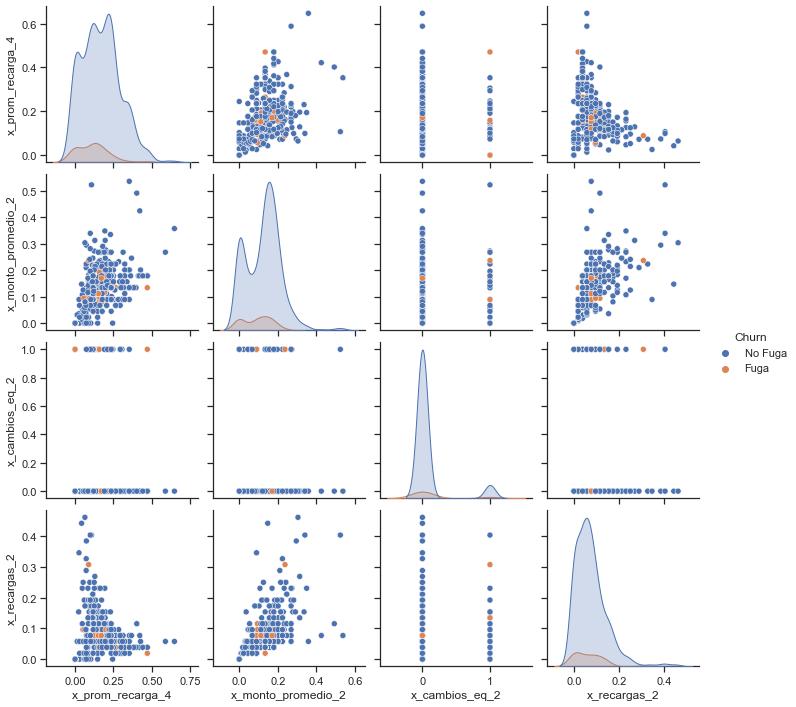

In [296]:
sns.pairplot(X[best+ ['Churn']].sample(500), hue="Churn")

In [297]:
pi_pca = make_pipeline(StandardScaler(),PCA())
pi_pca.fit(X[varc])
Xp = pd.DataFrame(pi_pca.transform(X[varc]),columns=[f'd%i'%(i+1) for i in range(len(varc))])
Xp[um] = Xi[um]
Xp[vart] = Xi[vart]
Xp[vart[0]].replace({0:'No Fuga',1:'Fuga'},inplace=True)
Xp.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,linea,ancla,churn
0,-1.495265,1.487797,-0.557103,0.322048,-1.166513,-0.209344,0.430517,-0.256698,0.081370,0.141221,-0.184315,-0.308998,0.209582,-0.095006,-0.051244,1.355275e-15,2.483605e-16,2.436183e-16,2.860587e-16,-1.521257e-16,-1.337408e-16,1.029481e-16,2221139363,3,Fuga
1,-1.091502,-0.991726,-0.523434,0.297260,-0.342509,0.063129,-0.883196,0.147543,0.456044,0.359692,0.068367,-0.073389,-0.152707,-0.024783,0.006227,-1.669863e-16,-7.556440e-16,9.684187e-17,1.001071e-16,1.584884e-17,6.267028e-17,-6.972210e-18,2283243093,3,Fuga
2,-5.652081,-0.095282,0.851517,-0.263571,0.460139,1.355750,0.171731,-0.020895,0.019746,-0.032763,-0.021902,-0.016690,0.006471,0.017281,0.004282,-5.502729e-15,2.323721e-16,3.675340e-18,-2.046378e-16,1.168991e-16,2.670238e-17,3.998177e-17,2461033436,3,Fuga
3,2.692100,-2.464884,-0.417419,0.740660,0.155840,-0.139776,0.376355,0.809092,0.197906,-0.137063,-0.115440,0.090391,0.112768,-0.001630,0.018148,-7.621510e-16,4.976119e-16,-6.547644e-17,-1.489649e-16,9.063085e-17,2.098578e-17,4.916195e-17,2731261175,3,Fuga
4,1.907807,-1.326578,-0.399950,-0.180286,-0.502037,-0.067444,-0.053595,0.066147,0.044594,-0.355859,0.150805,-0.088947,-0.161160,0.008883,0.009523,7.357192e-15,-3.437449e-16,-6.345634e-18,-7.125612e-18,2.369048e-17,3.679922e-17,3.119855e-17,2851009183,3,Fuga


In [298]:
pi_pca.steps[-1][-1].explained_variance_ratio_.cumsum()##Varianza explicada por los componentes

array([0.59985519, 0.8289926 , 0.90279281, 0.92899985, 0.94945466,
       0.96655834, 0.98125355, 0.98798045, 0.99290684, 0.99657066,
       0.99834376, 0.99924556, 0.99971846, 0.99996879, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [299]:
Xp.sample(1000).iplot(kind='scatter',x='d1',y='d2',categories=vart[0],mode='markers')

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\VDMG015\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [300]:
Xp['churn'].value_counts(True)

No Fuga    0.904977
Fuga       0.095023
Name: churn, dtype: float64

## Partición de datos

In [301]:
Xt,Xv,yt,yv = train_test_split(X[um+varc],X[um+vart],train_size=0.7)

In [302]:
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

# Modelado

## Regresión Logística

In [378]:
modelo = LogisticRegression()

In [391]:
modelo.fit(Xt[varc],yt[vart[0]])

LogisticRegression()

In [392]:
modelo.coef_[0]

array([-0.11352153,  2.08327104,  0.53363074,  0.07234552, -0.30920162,
       -0.44653245, -1.61720867, -1.49326072, -0.17761933, -0.20503813,
       -0.42998033, -0.06251225, -0.42998033, -0.06251225, -0.12803498,
       -0.33967084, -0.32272069, -0.14226171, -0.32272069, -0.14226171,
       -0.12803498, -0.33967084])

### Parámetros

In [394]:
pd.DataFrame([varc,modelo.coef_[0]]).T.sort_values(by=1)

,0,1
6,x_min_monto_2,-1.617209
7,x_min_monto_4,-1.493261
5,x_max_recarga_4,-0.446532
10,x_monto_promedio_2,-0.42998
12,x_monto_recargado_2,-0.42998
15,x_prom_recarga_4,-0.339671
21,x_sum_prom_recarga_4,-0.339671
16,x_recargas_2,-0.322721
18,x_recargas_prom_2,-0.322721
4,x_max_recarga_2,-0.309202


### Intercepto

In [395]:
modelo.intercept_

array([-1.75094314])

In [383]:
lr = LogisticRegression(fit_intercept=False)

In [384]:
import seaborn as sns
sns.set_theme(style="ticks")

In [390]:
lr.fit(Xt[varc],yt[vart[0]])

LogisticRegression(fit_intercept=False)

In [386]:
pd.DataFrame([best,lr.coef_[0]]).T.sort_values(by=1)

,0,1
0,x_prom_recarga_4,-6.262151
1,x_monto_promedio_2,-4.530839
3,x_recargas_2,-4.400296
2,x_cambios_eq_2,-0.19794


In [387]:
lr.intercept_

array([0.])

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

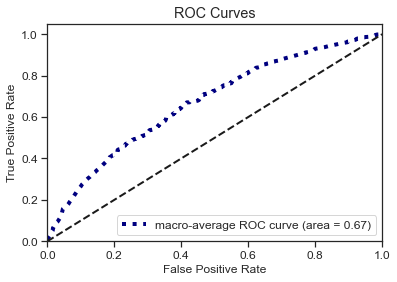

In [352]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

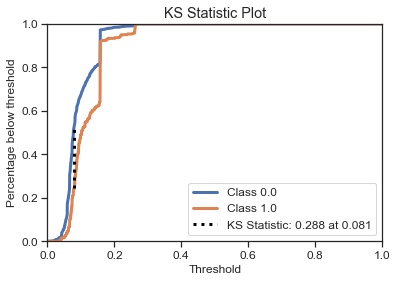

In [353]:
plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

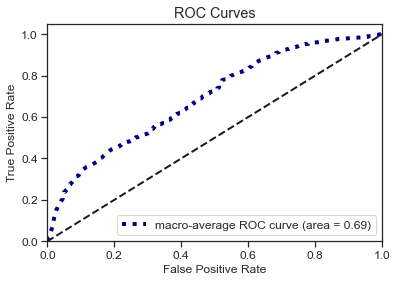

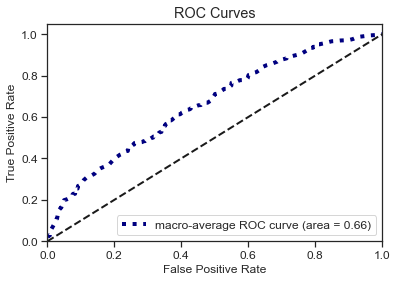

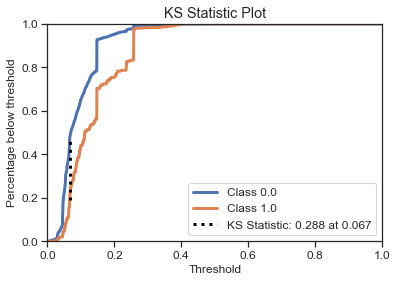

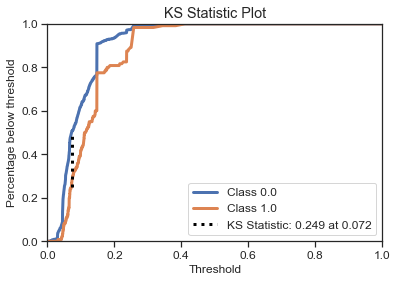

In [396]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

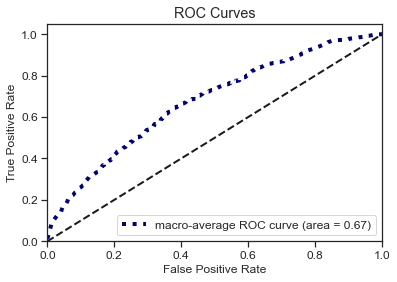

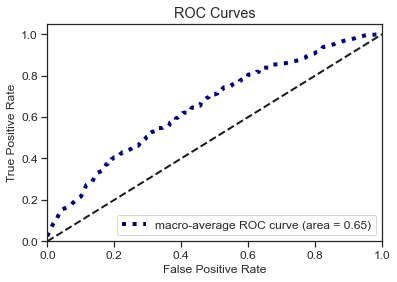

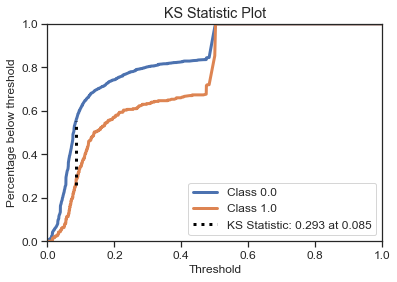

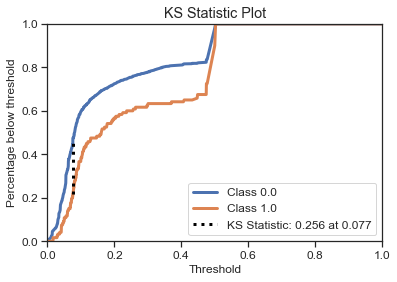

In [398]:
plot_roc_curve(y_probas=lr.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=lr.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=lr.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=lr.predict_proba(Xv[varc]),y_true=yv[vart[0]])

In [400]:
confusion_matrix(yv[vart[0]],lr.predict(Xv[varc]))

array([[1183,   23],
       [ 108,   12]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

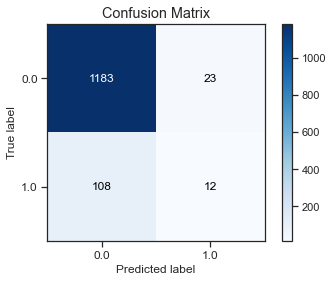

In [403]:
plot_confusion_matrix(yv[vart[0]],lr.predict(Xv[varc]), normalize=False)

In [373]:
aux=pd.DataFrame(modelo.predict_proba(Xv[varc]))

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

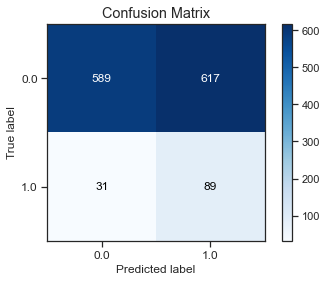

In [389]:
plot_confusion_matrix(yv[vart[0]],aux[1]>.081, normalize=False)

In [358]:
confusion_matrix(yv[vart[0]],modelo.predict(Xv[best]))

array([[1206,    0],
       [ 120,    0]], dtype=int64)

### Máquina Vector Soporte

In [326]:
modelo = SVC(probability=True)

In [327]:
modelo.fit(Xt[best],yt[vart[0]])

SVC(probability=True)

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

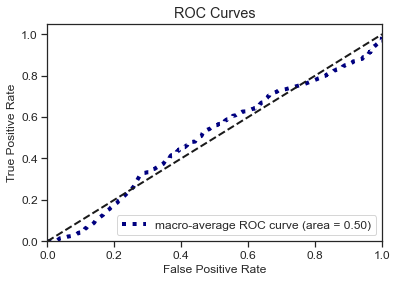

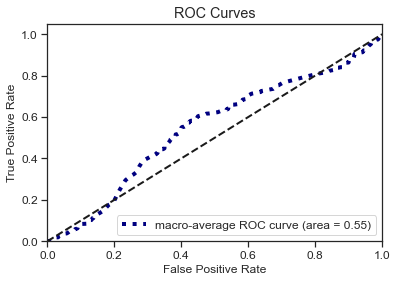

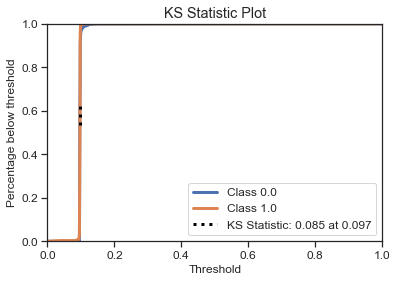

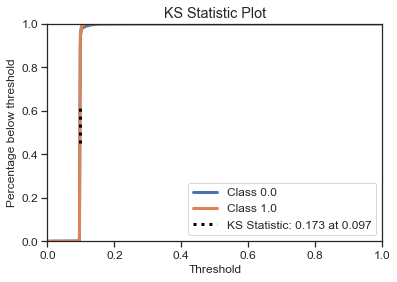

In [328]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[vart[0]])

### Red Neuronal

In [369]:
modelo = MLPClassifier()

In [370]:
%%time
modelo.fit(Xt[varc],yt[vart[0]])

Wall time: 4.68 s


C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

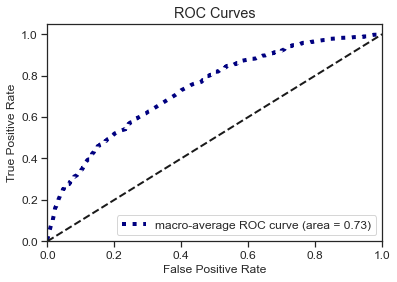

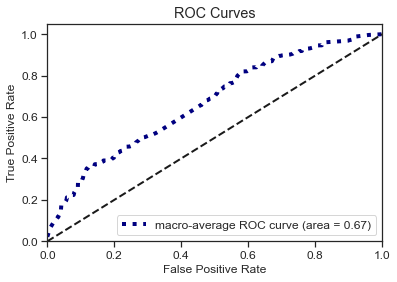

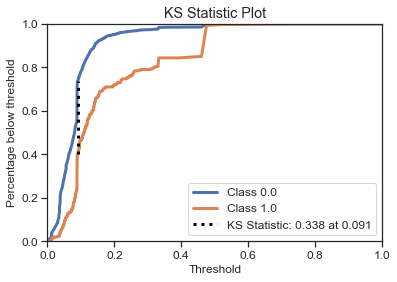

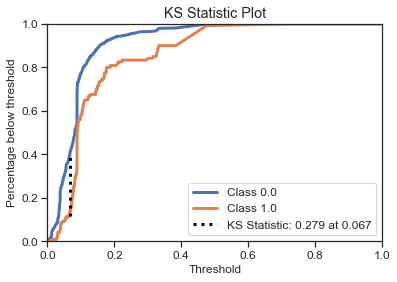

In [371]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

In [332]:
from xgboost.sklearn import XGBClassifier
modelo = XGBClassifier()

In [333]:
modelo.fit(Xt[varc], yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [334]:
from sklearn.metrics import confusion_matrix, accuracy_score
yp = modelo.predict(Xv[varc])
cm = confusion_matrix(yv[vart[0]], yp)
print(cm)
accuracy_score(yv[vart[0]], yp)

[[1166   40]
 [ 105   15]]


0.8906485671191554

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

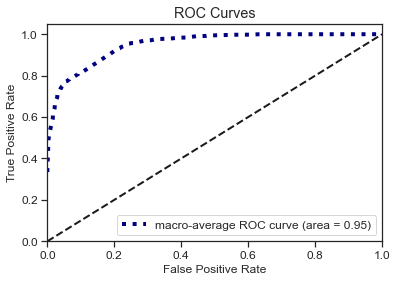

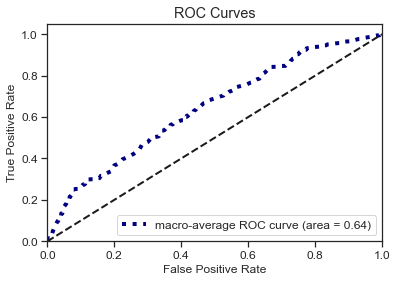

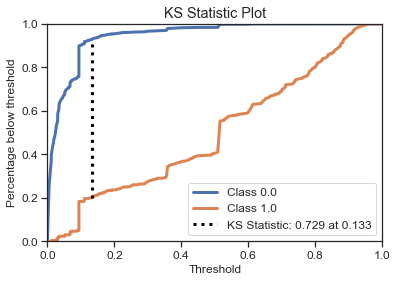

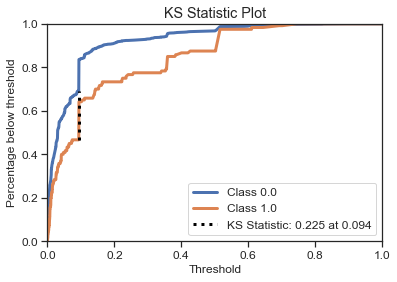

In [335]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

In [336]:
gradilla_hp={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

grid = RandomizedSearchCV(cv=4,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=100)

grid.fit(Xt[varc],yt[vart[0]])

modelo = grid.best_estimator_
modelo

grid.best_params_

grid.best_score_

modelo.fit(Xt[varc],yt[vart[0]])

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

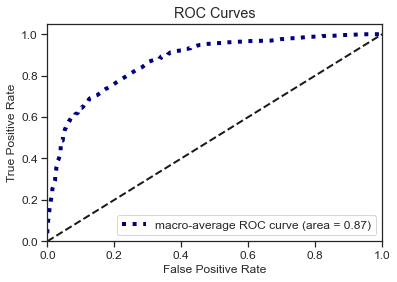

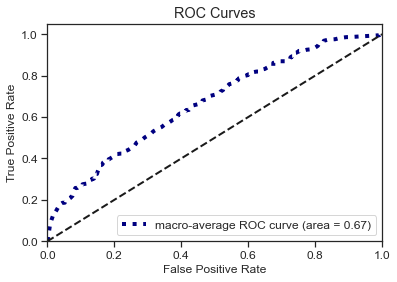

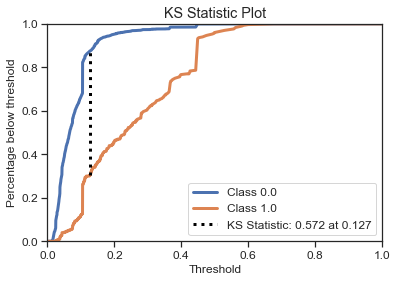

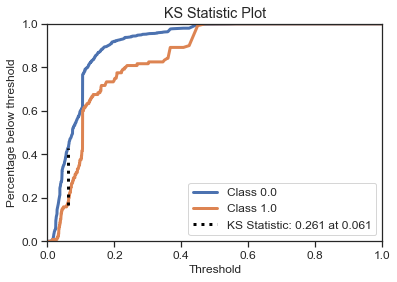

In [337]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

In [338]:
d=pd.DataFrame(modelo.predict_proba(Xt[varc]))

In [339]:
tn, fp, fn, tp = confusion_matrix(yt[vart[0]],modelo.predict(Xt[varc])).ravel()

In [340]:
tn, fp, fn, tp

(2793, 1, 288, 12)

In [341]:
confusion_matrix(yt[vart[0]],modelo.predict(Xt[varc]))

array([[2793,    1],
       [ 288,   12]], dtype=int64)

In [714]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [715]:
yv['proba']=pd.DataFrame(modelo.predict_proba(Xv[varc]))[1]

In [716]:
fpr, tpr, threshold = roc_curve(yv[vart[0]], yv['proba'])

In [717]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(yv[vart[0]], yv['proba'])


In [718]:
threshold[0]

0.12617336537040777

In [719]:
yv['pred']=yv['proba'].map(lambda x: 1 if x > threshold[0] else 0)

In [720]:
confusion_matrix(yv[vart[0]], yv['pred'])

array([[658, 243],
       [ 59,  66]], dtype=int64)

In [721]:
confusion_matrix(yt[vart[0]],modelo.predict(Xt[varc]))

array([[2071,   28],
       [ 258,   37]], dtype=int64)

In [627]:
152/295, 518/2099

(0.5152542372881356, 0.24678418294425916)

In [628]:
37/295, 27/2099

(0.12542372881355932, 0.012863268222963315)

In [731]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelo, X = Xt[varc], y = yt[vart[0]], cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\VDMG015\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.63 %
Standard Deviation: 0.91 %


<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

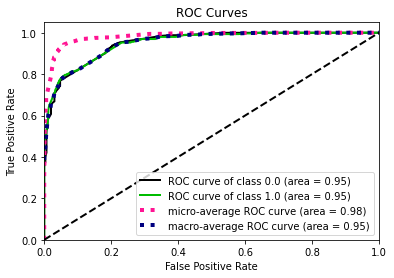

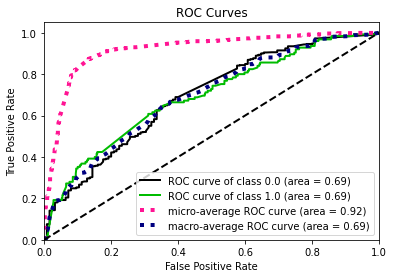

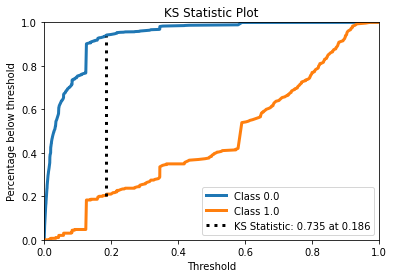

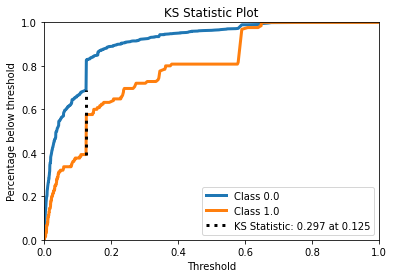

In [736]:
plot_roc(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_roc(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

### Bosque Aleatorio

In [681]:
modelo = RandomForestClassifier()

In [682]:
%%time
modelo.fit(Xt[varc],yt[vart[0]])

RandomForestClassifier()

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

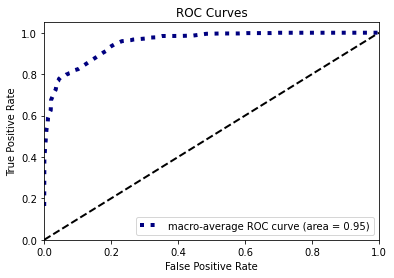

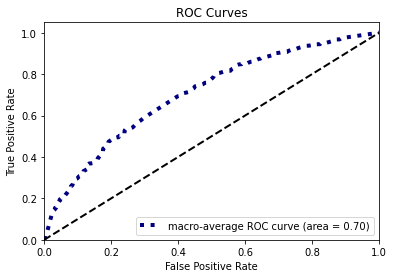

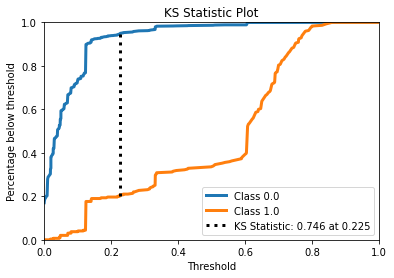

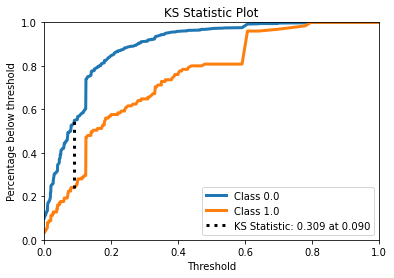

In [683]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

### Hiperparametrización

In [686]:
gradilla_hp = dict(n_estimators = range(10,200,10),
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,10)
                  )

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=100)

grid.fit(Xt[varc],yt[vart[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[varc],yt[vart[0]])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 70, 'max_depth': 6, 'criterion': 'entropy'}
0.6802149342314593


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=70)

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

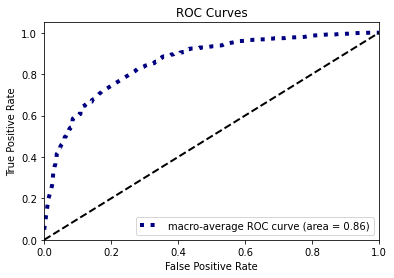

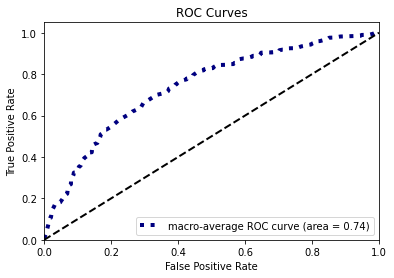

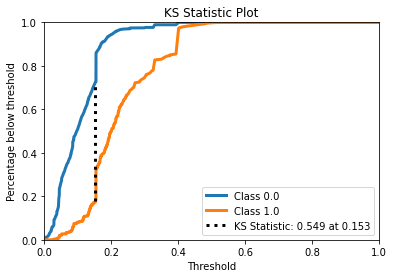

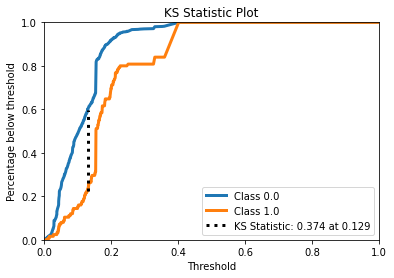

In [687]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

### Árbol de Decisión

In [646]:
modelo = DecisionTreeClassifier()

In [497]:
modelo.fit(Xt[varc],yt[vart[0]])

DecisionTreeClassifier()

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

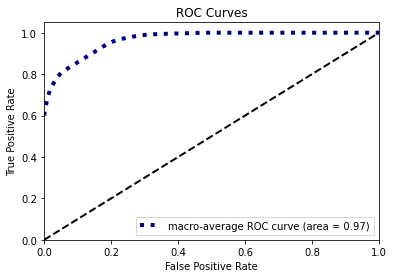

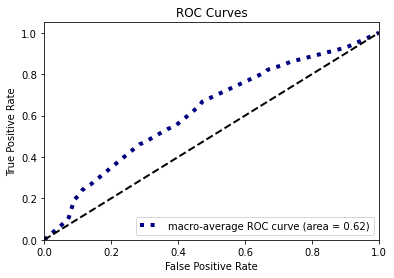

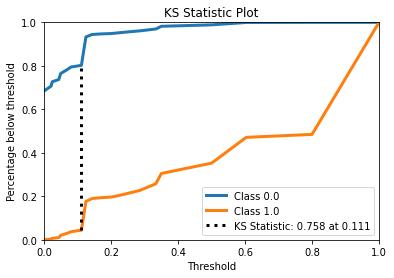

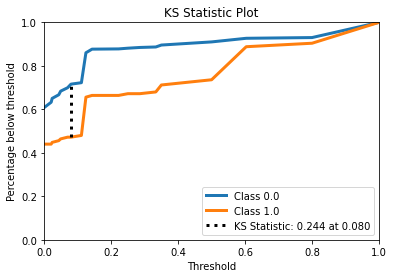

In [498]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])

### Hiperparametrización

In [649]:
gradilla_hp = dict(
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,50)
                  )

grid = RandomizedSearchCV(cv=4,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=200)

grid.fit(Xt[varc],yt[vart[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[varc],yt[vart[0]])

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 96 is smaller than n_iter=200. Running 96 iterations. For exhaustive searches, use GridSearchCV.



Fitting 4 folds for each of 96 candidates, totalling 384 fits
{'max_depth': 3, 'criterion': 'entropy'}
0.6501778649606869


DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Área bajo la curva ROC

### Estadístico de KS bajo diferentes puntos de corte de probabilidad

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

C:\Users\VDMG015\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

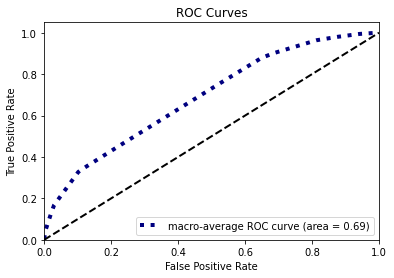

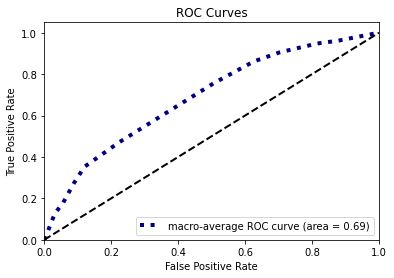

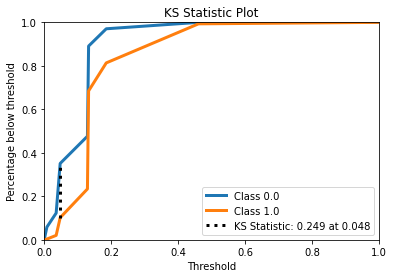

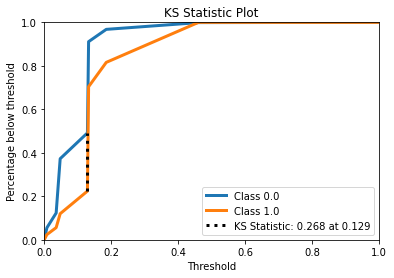

In [650]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[varc]),y_true=yt[vart[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[varc]),y_true=yv[vart[0]])